In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [183]:
x_bound = [0.5, 1]
y_bound = [-0.3, 0.3]
grid_size = 20
object_radius = 0.1
bias_x = np.random.rand() * (x_bound[1] - x_bound[0]) + x_bound[0]
bias_y = np.random.rand() * (y_bound[1] - y_bound[0]) + y_bound[0]
bias_position = np.array([bias_x, bias_y])

init_hand_pos = np.array([0.5, 0.0]) #get this from the robot

0.26063895999359327
[0.03348581 0.03805133 0.04313346 0.04877466 0.05501862 0.06190998
 0.06949396 0.07781601 0.08692132 0.09685436 0.10765829 0.11937443
 0.13204155 0.14569525 0.16036724 0.17608462 0.1928691  0.21073631
 0.22969501 0.24974641 0.27088341 0.29309004 0.31634079 0.34060013
 0.36582207 0.39194983 0.41891562 0.44664049 0.47503447 0.50399664
 0.5334155  0.56316948 0.59312752 0.62314988 0.65308911 0.68279111
 0.71209633 0.7408412  0.7688595  0.79598398 0.82204795 0.84688699
 0.87034062 0.89225405 0.91247985 0.93087962 0.94732554 0.96170185
 0.97390623 0.98385096 0.99146405 0.99669002 0.99949063 0.99984535
 0.99775157 0.99322465 0.98629775 0.97702141 0.96546292 0.95170555
 0.9358475  0.91800079 0.89828988 0.87685027 0.85382695 0.82937274
 0.80364665 0.77681214 0.74903542 0.72048374 0.69132379 0.66172006
 0.6318334  0.60181962 0.57182823 0.54200129 0.51247246 0.48336615
 0.45479681 0.42686846 0.39967429 0.37329644 0.34780591 0.32326266
 0.29971579 0.2772038  0.25575506 0.235388

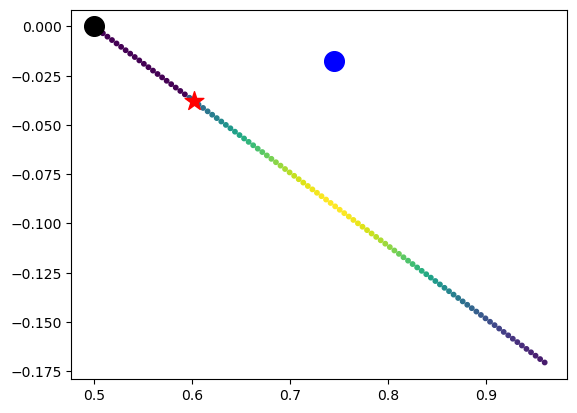

0.1231816478597696
[0.46828138 0.48513893 0.50217927 0.51937956 0.53671577 0.55416268
 0.57169398 0.58928228 0.6068992  0.62451543 0.64210079 0.65962431
 0.67705434 0.6943586  0.71150431 0.72845826 0.74518694 0.76165661
 0.77783345 0.79368367 0.80917357 0.82426974 0.83893913 0.85314915
 0.86686785 0.88006399 0.89270718 0.90476799 0.91621806 0.92703022
 0.93717858 0.94663867 0.95538749 0.96340364 0.97066737 0.97716073
 0.98286756 0.98777361 0.99186658 0.99513619 0.99757418 0.99917442
 0.99993284 0.99984753 0.99891871 0.99714873 0.99454206 0.99110528
 0.98684705 0.98177806 0.97591102 0.96926057 0.96184322 0.95367732
 0.94478294 0.93518181 0.92489724 0.913954   0.90237823 0.89019737
 0.87743999 0.86413574 0.85031517 0.83600969 0.82125139 0.80607294
 0.7905075  0.77458853 0.75834976 0.74182501 0.72504808 0.70805267
 0.69087224 0.67353992 0.65608841 0.63854986 0.62095579 0.60333701
 0.58572354 0.5681445  0.55062809 0.53320147 0.51589074 0.49872089
 0.4817157  0.46489777 0.44828844 0.4319078

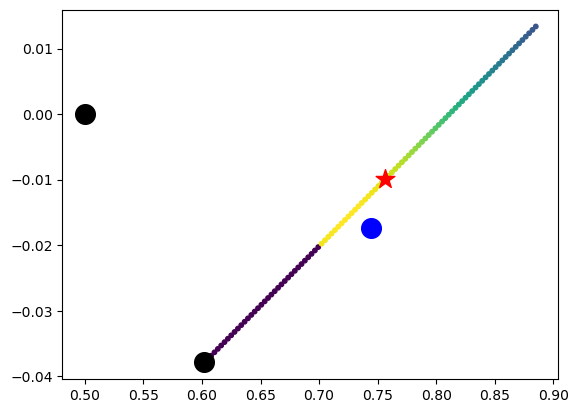

0.1706541845887968
[0.23313385 0.23427277 0.23541534 0.23656154 0.23771139 0.23886487
 0.24002199 0.24118274 0.24234713 0.24351515 0.2446868  0.24586208
 0.24704098 0.24822351 0.24940967 0.25059944 0.25179284 0.25298985
 0.25419047 0.25539471 0.25660255 0.25781401 0.25902906 0.26024772
 0.26146997 0.26269582 0.26392526 0.26515828 0.26639489 0.26763509
 0.26887885 0.2701262  0.27137711 0.27263159 0.27388963 0.27515123
 0.27641638 0.27768507 0.27895732 0.2802331  0.28151242 0.28279527
 0.28408164 0.28537154 0.28666495 0.28796187 0.28926229 0.29056621
 0.29187363 0.29318453 0.29449892 0.29581678 0.29713812 0.29846291
 0.29979117 0.30112287 0.30245802 0.30379661 0.30513863 0.30648408
 0.30783294 0.30918521 0.31054089 0.31189997 0.31326243 0.31462827
 0.31599749 0.31737007 0.31874602 0.32012531 0.32150794 0.32289391
 0.32428321 0.32567582 0.32707174 0.32847096 0.32987347 0.33127927
 0.33268834 0.33410067 0.33551625 0.33693509 0.33835715 0.33978245
 0.34121096 0.34264268 0.34407759 0.3455156

/tmp/ipykernel_4205/180355647.py:26: RuntimeWarning: invalid value encountered in divide
  probabilities = probabilities / np.sum(probabilities)


ValueError: probabilities contain NaN

In [192]:
past_points = [init_hand_pos]
p_effort = 0.5
angle_std = 0.1
dist_std = 0.1
reach_std = 0.1

def run_search(past_points):
    dist = np.linalg.norm(bias_position - past_points[-1])
    angle = np.arctan2(bias_position[1] - past_points[-1][1], bias_position[0] - past_points[-1][0])
    noisy_angle = np.random.normal(angle, angle_std)
    noisy_dist = np.random.normal(dist, dist_std)
    while noisy_dist < object_radius:
        noisy_dist = np.random.normal(dist, dist_std)
    N = 100
    pseudo_target = np.array([dist * 2 * np.cos(noisy_angle), dist * 2 * np.sin(noisy_angle)]) + past_points[-1]
    line_points = np.array([np.linspace(past_points[-1][0], pseudo_target[0], N), np.linspace(past_points[-1][1], pseudo_target[1], N)]).T
    print(noisy_dist)
    noisy_target = np.array([noisy_dist * np.cos(noisy_angle), noisy_dist * np.sin(noisy_angle)]) + past_points[-1]
    probabilities = np.exp(-0.5 * ((line_points - noisy_target)**2 / reach_std**2).sum(axis=1))
    for i in range(N):
        for p in past_points:
            if np.linalg.norm(p - line_points[i]) < object_radius:
                probabilities[i] = 0
                break
    print(probabilities)
    probabilities = probabilities / np.sum(probabilities)
    next_point = line_points[np.random.choice(N, p=probabilities)]
    # plot the heatmap
    plt.scatter(line_points[:, 0], line_points[:, 1], c=probabilities, marker='o', s=10)
    # plt.scatter(line_points[:, 0], line_points[:, 1], c='lightgray', marker='o', s=10)
    plt.scatter(next_point[0], next_point[1], c='r', marker='*', s=200)
    plt.scatter(bias_position[0], bias_position[1], c='b', marker='o', s=200)
    for p in past_points:
        plt.scatter(p[0], p[1], c='k', marker='o', s=200)
    plt.show()
    return next_point

for i in range(10):
    next_point = run_search(past_points)
    past_points.append(next_point)




# # plot the heatmap of the grid with probability = dist_to_line

# def run_search(past_points, p_effort = 0.5):
#     dist = np.linalg.norm(bias_position - past_points[-1])
#     angle = np.arctan2(bias_position[1] - past_points[-1][1], bias_position[0] - past_points[-1][0])
#     noisy_dist = np.random.normal(dist, bias_std)
#     noisy_angle = np.random.normal(angle, bias_std)
#     # get the distance between all points in the grid and the line passing through the initial hand position with the angle = angle
#     dist_to_line = -np.log(np.abs(np.sin(noisy_angle) * (grid[:, 0] - past_points[-1][0]) - np.cos(noisy_angle) * (grid[:, 1] - past_points[-1][1])))
#     dist_to_point = -np.log(np.linalg.norm(grid - past_points[-1], axis=1))
#     combined_dist = (1 - p_effort) * dist_to_line + p_effort * dist_to_point
#     combined_dist = combined_dist / np.sum(combined_dist)
#     # sample a point from the grid with the probability of combined_dist
#     next_point = grid[np.argmin(combined_dist)]
#     return next_point

In [150]:
# x = np.linspace(x_bound[0], x_bound[1], grid_size)
# y = np.linspace(y_bound[0], y_bound[1], grid_size)
# grid = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
# plt.scatter(grid[:, 0], grid[:, 1], c='lightgray', marker='o', s=10)
# plt.scatter(bias_position[0], bias_position[1], c='r', marker='*', s=200)
# plt.scatter(init_hand_pos[0], init_hand_pos[1], c='g', marker='s', s=200)
# plt.show()

(array([112., 132.,  80.,  37.,  20.,   9.,   4.,   3.,   1.,   2.]),
 array([0.00072338, 0.00161407, 0.00250475, 0.00339544, 0.00428612,
        0.00517681, 0.00606749, 0.00695818, 0.00784886, 0.00873954,
        0.00963023]),
 <BarContainer object of 10 artists>)

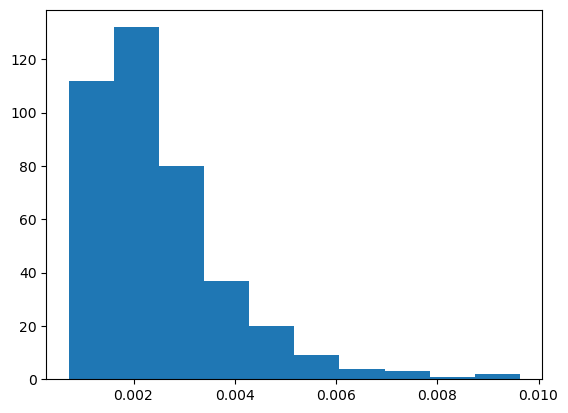

In [16]:
plt.hist(dist_to_line)

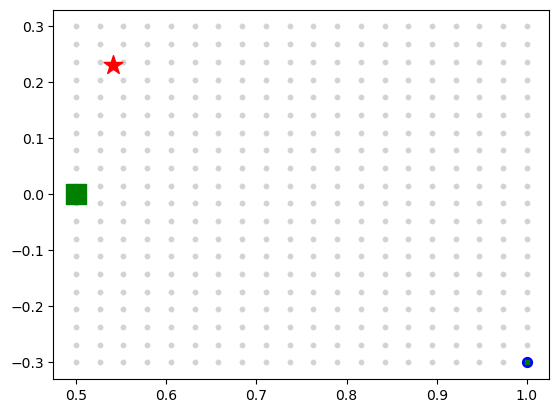

0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649


/tmp/ipykernel_4383/2365667177.py:10: RuntimeWarning: divide by zero encountered in log
  dist_to_line = -np.log(np.abs(np.sin(noisy_angle) * (grid[:, 0] - past_points[-1][0]) - np.cos(noisy_angle) * (grid[:, 1] - past_points[-1][1])))
/tmp/ipykernel_4383/2365667177.py:11: RuntimeWarning: divide by zero encountered in log
  dist_to_point = -np.log(np.linalg.norm(grid - past_points[-1], axis=1))
/tmp/ipykernel_4383/2365667177.py:13: RuntimeWarning: invalid value encountered in divide
  combined_dist = combined_dist / np.sum(combined_dist)


0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.701541050798649
0.70154105

In [41]:
past_points = [init_hand_pos]
fig, ax = plt.subplots()
ax.scatter(grid[:, 0], grid[:, 1], c='lightgray', marker='o', s=10)
ax.scatter(bias_position[0], bias_position[1], c='r', marker='*', s=200)
ax.scatter(init_hand_pos[0], init_hand_pos[1], c='g', marker='s', s=200)
while True:
    next_point = run_search(past_points, p_effort = 0.5)
    past_points.append(next_point)
    ax.scatter(next_point[0], next_point[1], c='b', marker='o', s=50)
    # scatter plot all past points
    ax.scatter([p[0] for p in past_points], [p[1] for p in past_points], c='g', marker='s', s=10)
    plt.show()
    print(np.linalg.norm(next_point - bias_position))
    if np.linalg.norm(next_point - bias_position) < object_radius:
        break

In [23]:
def run_search(past_points):
    prob = np.zeros(grid_size * grid_size)
    for i in range(grid_size * grid_size):
        exclusion = False
        for past_point in past_points:
            if np.linalg.norm(grid[i] - past_point) < object_radius:
                prob[i] = 0
                exclusion = True
        if not exclusion:
            prob[i] = np.exp(-np.linalg.norm(grid[i] - bias_position) ** 2 / (2 * bias_std ** 2))
    prob /= np.sum(prob)

    gain = np.zeros(grid_size * grid_size)
    for i in range(grid_size * grid_size):
        gain[i] = -np.log(np.linalg.norm(grid[i] - past_points[-1]))

    expected_gain = prob * gain
    expected_gain /= np.sum(expected_gain)
    chosen_index = np.random.choice(grid_size * grid_size, p=expected_gain)
    next_point = grid[chosen_index]
    return next_point

In [29]:
past_points = [init_hand_pos, next_point]

In [30]:
prob = np.zeros(grid_size * grid_size)
for i in range(grid_size * grid_size):
    exclusion = False
    for past_point in past_points:
        if np.linalg.norm(grid[i] - past_point) < object_radius:
            prob[i] = 0
            exclusion = True
    if not exclusion:
        prob[i] = np.exp(-np.linalg.norm(grid[i] - bias_position) ** 2 / (2 * bias_std ** 2))
prob /= np.sum(prob)

gain = np.zeros(grid_size * grid_size)
for i in range(grid_size * grid_size):
    gain[i] = -np.log(np.linalg.norm(grid[i] - past_points[-1]))

expected_gain = prob * gain
expected_gain /= np.sum(expected_gain)
chosen_index = np.random.choice(grid_size * grid_size, p=expected_gain)
next_point = grid[chosen_index]

/tmp/ipykernel_19500/259618622.py:14: RuntimeWarning: divide by zero encountered in log
  gain[i] = -np.log(np.linalg.norm(grid[i] - past_points[-1]))
/tmp/ipykernel_19500/259618622.py:16: RuntimeWarning: invalid value encountered in multiply
  expected_gain = prob * gain


ValueError: probabilities contain NaN

In [34]:
prob

array([0.00405021, 0.0041575 , 0.00424113, 0.00429955, 0.0043317 ,
       0.00433697, 0.00431527, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00349917, 0.00331232,
       0.00311596, 0.00291303, 0.0027064 , 0.0024988 , 0.00229279,
       0.00406811, 0.00417588, 0.00425988, 0.00431856, 0.00435085,
       0.00435614, 0.00433434, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00351464, 0.00332696,
       0.00312974, 0.00292591, 0.00271836, 0.00250984, 0.00230292,
       0.00406845, 0.00417623, 0.00426023, 0.00431892, 0.00435121,
       0.0043565 , 0.0043347 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00351494, 0.00332724,
       0.00313   , 0.00292615, 0.00271859, 0.00251005, 0.00230311,
       0.00405121, 0.00415854, 0.00424218, 0.00430062, 0.00433277,
       0.00433805, 0.00431634, 0.00426805, 0.        , 0.        ,
       0.        , 0.        , 0.00367452, 0.00350004, 0.00331

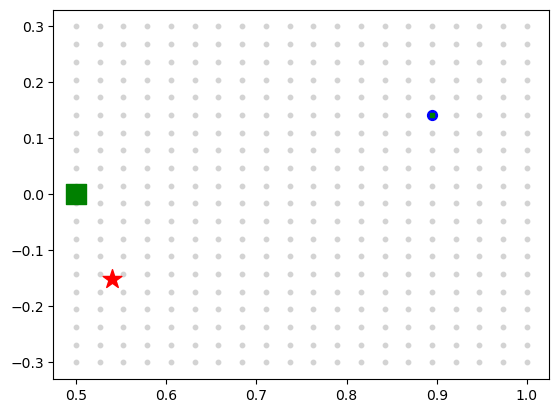

/tmp/ipykernel_19500/288345623.py:15: RuntimeWarning: divide by zero encountered in log
  gain[i] = -np.log(np.linalg.norm(grid[i] - past_points[-1]))
/tmp/ipykernel_19500/288345623.py:17: RuntimeWarning: invalid value encountered in multiply
  expected_gain = prob * gain


ValueError: probabilities contain NaN

In [24]:
# past_points = [init_hand_pos]
# plt.scatter(grid[:, 0], grid[:, 1], c='lightgray', marker='o', s=10)
# plt.scatter(bias_position[0], bias_position[1], c='r', marker='*', s=200)
# plt.scatter(init_hand_pos[0], init_hand_pos[1], c='g', marker='s', s=200)
# while True:
#     next_point = run_search(past_points)
#     past_points.append(next_point)
#     plt.scatter(next_point[0], next_point[1], c='b', marker='o', s=50)
#     # scatter plot all past points
#     plt.scatter([p[0] for p in past_points], [p[1] for p in past_points], c='g', marker='s', s=10)
#     plt.show()
#     if np.linalg.norm(next_point - bias_position) < object_radius:
#         break

In [40]:
# choose one point from the grid based on the expected gain


(400,)